In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv('machine.data')

In [3]:
df.head()

,adviser,32/60,125,256,6000,256.1,16,128,198,199
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290


In [4]:
df.columns=['vendorname','Model Name','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP']

In [5]:
df.head()

,vendorname,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 10 columns):
vendorname    208 non-null object
Model Name    208 non-null object
MYCT          208 non-null int64
MMIN          208 non-null int64
MMAX          208 non-null int64
CACH          208 non-null int64
CHMIN         208 non-null int64
CHMAX         208 non-null int64
PRP           208 non-null int64
ERP           208 non-null int64
dtypes: int64(8), object(2)
memory usage: 16.3+ KB


In [7]:
df.drop(['vendorname','Model Name'],inplace=True,axis=1)

In [8]:
df.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,29,8000,32000,32,8,32,269,253
1,29,8000,32000,32,8,32,220,253
2,29,8000,32000,32,8,32,172,253
3,29,8000,16000,32,8,16,132,132
4,26,8000,32000,64,8,32,318,290


In [9]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.10,random_state=42)

In [12]:
#Normalizing Data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)

C:\Users\Shruthi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


C:\Users\Shruthi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
C:\Users\Shruthi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [15]:
y_train = y_train.values.reshape(-1, 1)
y_test  = y_test.values.reshape(-1, 1)
y_scaler = StandardScaler()
# Fit on training set only.
y_scaler.fit(y_train)
# Apply transform to both the training set and the test set.
y_train = y_scaler.transform(y_train)


y_test = y_scaler.transform(y_test)

C:\Users\Shruthi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Shruthi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Shruthi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [19]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(X_train,y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print("coefficient of determination R^2 of the prediction.:",model_score)
y_predicted = model.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f%", mean_squared_error(y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
print("Test Variance score: %.2f %", r2_score(y_test, y_predicted))

coefficient of determination R^2 of the prediction.: 0.9615729220949559
Mean squared error: %.2f% 0.13723929970435256
Test Variance score: %.2f % 0.9386078806265958


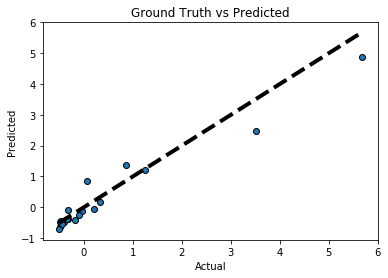

In [29]:
# run the model against the test data

fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))

ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)

ax.set_xlabel('Actual')

ax.set_ylabel('Predicted')

ax.set_title("Ground Truth vs Predicted")

plt.show()